<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github/ds5110/summer-2021/blob/master/07-modeling2-validation.ipynb">
<img src="https://github.com/ds5110/summer-2021/raw/master/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>

# 07-Modeling2 Validation

* Criteria for evaluating models
  * Holdout sets
  * Explained variance -- look at the diabetes dataset from last time
  * $R^2$ score -- coefficient of determination
  * [r_2score](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination) -- scikit-learn.org
* Overfitting and how to avoid it
* Performing cross-validation
* Selecting models

Reading: [Chapter 05.03 of VanderPlas](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.03-Hyperparameters-and-Model-Validation.ipynb)

# Validation curve

<img src="https://github.com/jakevdp/PythonDataScienceHandbook/raw/master/notebooks/figures/05.03-validation-curve.png">

Figure credit: [Chapter 05.03 of VanderPlas](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.03-Hyperparameters-and-Model-Validation.ipynb)

<img src="https://github.com/jakevdp/PythonDataScienceHandbook/raw/master/notebooks/figures/05.03-bias-variance.png">


Figure credit: [Chapter 05.03 of VanderPlas](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.03-Hyperparameters-and-Model-Validation.ipynb)

<img src="https://github.com/jakevdp/PythonDataScienceHandbook/raw/master/notebooks/figures/05.03-bias-variance-2.png">


Figure credit: [Chapter 05.03 of VanderPlas](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.03-Hyperparameters-and-Model-Validation.ipynb)

(40, 1)
(40,)


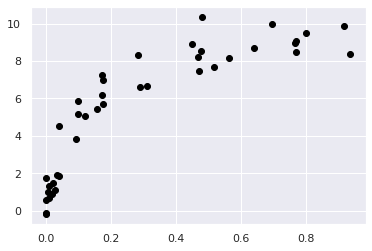

In [1]:
# Create a psudo-random dataset with some structure
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

print(X.shape)
print(y.shape)

# Q: What's the purpose of .ravel()?
plt.scatter(X.ravel(), y, color='black');

## Pipelines in Scikit-Learn

* [Pipelines and Composite Estimators](https://scikit-learn.org/stable/modules/compose.html#combining-estimators)
* [make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html?highlight=make_pipeline#sklearn.pipeline.make_pipeline)

Pipeline first creates a feature set of polonomials of specified degree,
then fits those polynomials to the dataset.


In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

(500, 1)


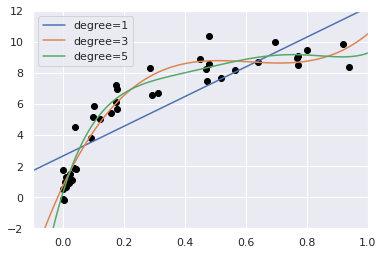

In [3]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
print(X_test.shape)

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

## Training and test datasets

* [Model selectioon](https://scikit-learn.org/stable/model_selection.html) -- scikit-learn.org
* [Train/Test Split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) -- scikit-learn.org
  * Part of the scikit-learn model_selection module
* [Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)
  * A methodology for evaluating model performance
  * Train/validation/test datasets



<img src="https://github.com/jakevdp/PythonDataScienceHandbook/raw/master/notebooks/figures/05.03-5-fold-CV.png">

Figure credit: 5-fold Crossvalidation from Chapter 05.03 of VanderPlas



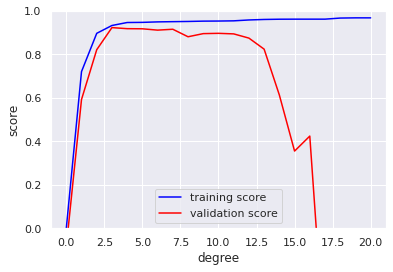

In [4]:
# NOTE: the API has changed since VanderPlas published his book
from sklearn.model_selection import validation_curve

degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

# Q: What's going on for degree > 10